In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.cluster import hierarchy
from scipy import cluster

In [3]:
#读取文件
df = pd.read_table('stat_res_eo_vs_oo1.csv',sep=',')
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Acidovorax sp. MR-S7,192.183471,1.412186,1.865722,0.756911,0.449103,0.676146
1,Acinetobacter sp. 1578804,338.073679,0.676869,1.903860,0.355524,0.722197,0.839651
2,Actinomyces dentalis DSM 19115,968.195395,3.672786,1.971867,1.862593,0.062520,0.132617
3,Actinomyces sp. ICM47,61.368051,-0.778241,1.591209,-0.489088,0.624779,0.767769
4,Actinomyces sp. oral taxon 180 str. F0310,5374.201722,-1.702304,2.280625,-0.746420,NaN,NaN


In [4]:
cut_off_pvalue = 0.0000001
cut_off_log2FC = 1

In [5]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import matplotlib as mpl
import math
%matplotlib inline

In [6]:
df.loc[(df.log2FoldChange>1)&(df.padj<0.05),'type']='up'
df.loc[(df.log2FoldChange<-1)&(df.padj<0.05),'type']='down'
df.loc[(abs(df.log2FoldChange)<=1)|(df.padj>=0.05),'type']='nosig'

In [7]:
df.head()

,groups,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,type
0,Acidovorax sp. MR-S7,192.183471,1.412186,1.865722,0.756911,0.449103,0.676146,nosig
1,Acinetobacter sp. 1578804,338.073679,0.676869,1.903860,0.355524,0.722197,0.839651,nosig
2,Actinomyces dentalis DSM 19115,968.195395,3.672786,1.971867,1.862593,0.062520,0.132617,nosig
3,Actinomyces sp. ICM47,61.368051,-0.778241,1.591209,-0.489088,0.624779,0.767769,nosig
4,Actinomyces sp. oral taxon 180 str. F0310,5374.201722,-1.702304,2.280625,-0.746420,NaN,NaN,NaN


In [8]:
df.type.value_counts()

nosig    49
down     12
up       12
Name: type, dtype: int64

In [9]:
df['p']=-df.padj.apply(math.log10)

In [10]:
df[['log2FoldChange','pvalue','type','padj','p']].head()

,log2FoldChange,pvalue,type,padj,p
0,1.412186,0.449103,nosig,0.676146,0.169959
1,0.676869,0.722197,nosig,0.839651,0.075901
2,3.672786,0.062520,nosig,0.132617,0.877400
3,-0.778241,0.624779,nosig,0.767769,0.114769
4,-1.702304,NaN,NaN,NaN,NaN


In [11]:
df1=df[['log2FoldChange','groups','p']]
df1

,log2FoldChange,groups,p
0,1.412186,Acidovorax sp. MR-S7,0.169959
1,0.676869,Acinetobacter sp. 1578804,0.075901
2,3.672786,Actinomyces dentalis DSM 19115,0.877400
3,-0.778241,Actinomyces sp. ICM47,0.114769
4,-1.702304,Actinomyces sp. oral taxon 180 str. F0310,NaN
...,...,...,...
104,5.541784,Streptomyces griseorubens,2.252259
105,0.592989,Tyzzerella nexilis DSM 1787,0.075901
106,-4.240687,Veillonella sp. 3_1_44,4.038149
107,-4.966057,Veillonella sp. 6_1_27,NaN


In [12]:
#df1以p列进行降序排序
df1=df1.sort_values(by='p',ascending=False)
df1

,log2FoldChange,groups,p
35,-17.898371,Enterobacter cloacae,19.929083
45,-18.958786,Klebsiella pneumoniae,19.306451
6,-11.929705,Alloscardovia omnicolens F0580,6.110905
69,8.209780,Porphyromonas sp. KLE 1280,4.647371
22,-4.240687,Capnocytophaga sputigena ATCC 33612,4.038149
...,...,...,...
100,-8.139842,Streptococcus cristatus,NaN
101,-11.252527,Streptococcus dysgalactiae subsp. equisimilis ...,NaN
102,-9.091027,Streptococcus dysgalactiae subsp. equisimilis ...,NaN
103,-7.766976,Streptococcus vestibularis F0396,NaN


In [13]:
#提取df1的前10行
df2=df1.head(9)
df2

,log2FoldChange,groups,p
35,-17.898371,Enterobacter cloacae,19.929083
45,-18.958786,Klebsiella pneumoniae,19.306451
6,-11.929705,Alloscardovia omnicolens F0580,6.110905
69,8.209780,Porphyromonas sp. KLE 1280,4.647371
22,-4.240687,Capnocytophaga sputigena ATCC 33612,4.038149
106,-4.240687,Veillonella sp. 3_1_44,4.038149
9,-4.240687,Bacillus cereus BAG2X1-3,4.038149
70,-4.240687,Prevotella aurantiaca JCM 15754,4.038149
59,6.107505,Neisseria meningitidis 2002004,2.589674


In [14]:
#删除df2含有Klebsiella pneumoniae的行
df2=df2[~df2['groups'].str.contains('Veillonella sp. 3_1_44')]
df2=df2[~df2['groups'].str.contains('Bacillus cereus BAG2X1-3')]
df2=df2[~df2['groups'].str.contains('Prevotella aurantiaca JCM 15754')]
df2

,log2FoldChange,groups,p
35,-17.898371,Enterobacter cloacae,19.929083
45,-18.958786,Klebsiella pneumoniae,19.306451
6,-11.929705,Alloscardovia omnicolens F0580,6.110905
69,8.209780,Porphyromonas sp. KLE 1280,4.647371
22,-4.240687,Capnocytophaga sputigena ATCC 33612,4.038149
59,6.107505,Neisseria meningitidis 2002004,2.589674


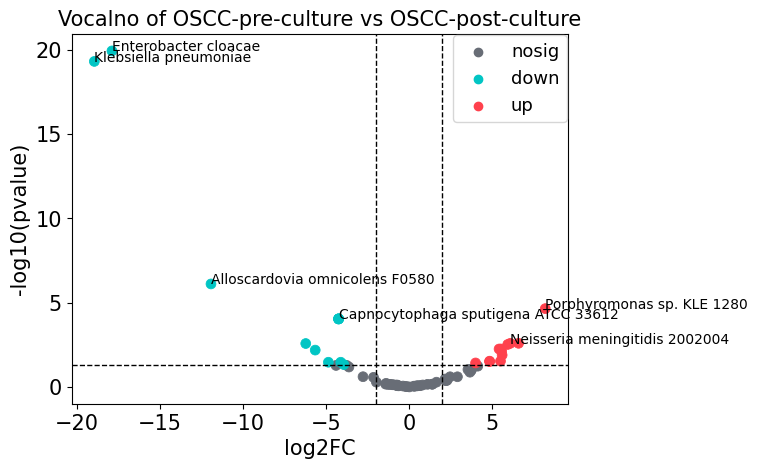

In [17]:
colors = ["#686d76","#01c5c4","#ff414d" ]
sns.set_palette(sns.color_palette(colors))
ax=sns.scatterplot(x='log2FoldChange', y='p',data=df,
                hue='type',#颜色映射
                edgecolor = None,#点边界颜色
                s=50,#点大小
                )
ax.set_title("Vocalno of OSCC-pre-culture vs OSCC-post-culture",fontsize=15)
for i, row in df2.iterrows():
    ax.text(row['log2FoldChange'], row['p'], row['groups'], horizontalalignment='left', size=10, color='black')

#Y轴在1.3的位置添加一条横的虚线
ax.axhline(y=1.3,ls="--",c="black",linewidth=1)
#X轴在-2和2的位置添加一条竖的虚线
ax.axvline(x=-2,ls="--",c="black",linewidth=1)
ax.axvline(x=2,ls="--",c="black",linewidth=1)
#纵坐标字体大小变大
ax.yaxis.set_tick_params(labelsize=15)

#横坐标字体大小变大
ax.xaxis.set_tick_params(labelsize=15)
ax.set_xlabel("log2FC",fontsize=15)
ax.set_ylabel("-log10(pvalue)",fontsize=15)
ax.legend(loc='center right', bbox_to_anchor=(1.016,0.88), ncol=1, fontsize=13)
fig = ax.get_figure()
plt.savefig('Vocalno OSCC-pre-culture vs OSCC-post-culture1.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [16]:
#在图中显示down和up点在Genomic bins列的值
for i in range(df.shape[0]):
    if df.loc[i,'type']=='up' or df.loc[i,'type']=='down':
        ax.text(df.loc[i,'log2FoldChange'],df.loc[i,'p'],df.loc[i,'Genomic bins'],fontsize=8)

KeyError: 'Genomic bins'